#  Factores que determinan la movilidad social en México: El papel de la educación de los padres 

Según el INEGI (Instituto Nacional de Estadística Geografía e Información) la movilidad social es entendida como la facilidad en que los individuos pueden cambiar su posición socioeconómica. 

En el módulo de Movilidad social (EMOVI) justo el objetivo es medir estos desplazamientos de niveles socioeconómicos con los que han contado las personas, la cuesta fue levantada en el 2016 y se entrevistaron a personas de 25 a 64 años, en la cual se les preguntó sobre su situación actual, su situación cuando tenía 14 años y condiciones de sus padres o proveedor principal en caso de que sea diferente al padre. Se levantaron 
32 481 entrevistas, sin embargo 3 377 hogares no contaban con personas en este rango de edad para ser entrevistadas, 3 006 no respondieron y 464 no respondieron, por lo tanto, se contó solo con 25 634 encuestas completas (en el anexo 1 se muestra una copia del cuestionario utilizado).





In [73]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pandas



   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 656.4 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.5 MB 751.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/11.5 MB 944.1 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.5 MB 952.6 kB/s eta 0:00:12
    --------------------------------------- 0.2/11.5 MB 778.2 kB/s eta 0:00:15
    --------------------------------------- 0.3/11.5 MB 930.9 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.5 MB 999.9 kB/s eta 0:00:12
   - -------------------------------------- 0.3/11.5 MB 838.1 kB/s eta 0:00:14
   - -------------------------------------- 0.4/11.5 MB 897.8 kB/s eta 0:00:13
   - -------------------------------------- 0.5/11.5 MB 960.7 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.5 MB 960.7 kB/s et

In [68]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 279.3 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 476.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 599.1 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 692.9 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 827.5 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 827.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Se realiza la importación de las librerias a utilizar 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga de la EMOVI 2016 en formato csv utilizando pandas 

emovi = pd.read_csv('C:/Users/reyna/OneDrive/Documentos/Maestría/desarollo_de_proyecto/Sprint/data/MMSI_2016.csv')

# Se quiere saber el nombre de las columnas que contiene el dataframe

nombres_columnas = emovi.columns

# Imprimir el nombre de las columnas 

print(nombres_columnas)

Index(['Folioviv', 'Foliohog', 'Id_pobla', 'ubica_geo_ENH', 'ent_ENH',
       'tam_loc_ENH', 'est_socio_ENH', 'est_dis_ENH', 'upm_ENH', 'P1_1',
       ...
       'cisterna_ENH', 'pileta_ENH', 'calent_sol_ENH', 'calent_gas_ENH',
       'medidor_luz_ENH', 'bomba_agua_ENH', 'tanque_gas_ENH', 'aire_acond_ENH',
       'calefacc_ENH', 'chimenea_ENH'],
      dtype='object', length=254)


C:\Users\reyna\AppData\Local\Temp\ipykernel_34612\1689874185.py:3: DtypeWarning: Columns (27,28,30,31,32,33,34,35,49,50,51,52,53,54,55,56,57,58,59,184,185,211,236) have mixed types. Specify dtype option on import or set low_memory=False.
  emovi = pd.read_csv('C:/Users/reyna/OneDrive/Documentos/Maestría/desarollo_de_proyecto/Sprint/data/MMSI_2016.csv')


In [4]:
# Para limpíar la base de datos, hay que identificar aquellos valores que tengamos como nulos

# Contar el número de valores nulos en cada columna
espacios_vacios = emovi.isnull().sum()

# Mostrar el número de espacios vacíos en cada columna
print(espacios_vacios)

Folioviv          0
Foliohog          0
Id_pobla          0
ubica_geo_ENH     0
ent_ENH           0
                 ..
bomba_agua_ENH    0
tanque_gas_ENH    0
aire_acond_ENH    0
calefacc_ENH      0
chimenea_ENH      0
Length: 254, dtype: int64


In [5]:
#Quitamos los valores nulos 


emovi_limpia = emovi.dropna()

# Verificar la forma del DataFrame después de eliminar los valores nulos
print("Forma del DataFrame original:", emovi.shape)
print("Forma del DataFrame después de eliminar los valores nulos:", emovi_limpia.shape)


Forma del DataFrame original: (25634, 254)
Forma del DataFrame después de eliminar los valores nulos: (25634, 254)


En este caso no encontraron valores nulos, por lo tanto se seguirá trabajando con el dataframe original que llamamos emovi

In [6]:
# Para saber cuantas son las entidades federativas con las cuales se cuenta información, se pide la impresaión 
# de los valores únicos de la varible "ent_ENH" la cual menciona la Entidad federativa de levantamiento de la encuesta. 

num_valores_unicos = emovi['ent_ENH'].nunique()

print("Número de valores únicos en 'ubica_geo_ENH':", num_valores_unicos)

Número de valores únicos en 'ubica_geo_ENH': 32


In [7]:
# Debido a que la variable ent_ENH se cuenta con valores y no el nombre de la ENtidad, creamos un diccionario de 
# los nombres de las entidades, esta información es proporcionada por el INEGI en el Catálogo de entiedades Federativas 

# Definir el diccionario de nombres de entidades
diccionario_entidades = {
    1: 'Aguascalientes',
    2: 'Baja California',
    3: 'Baja California Sur',
    4: 'Campeche',
    5: 'Coahuila de Zaragoza',
    6: 'Colima',
    7: 'Chiapas',
    8: 'Chihuahua',
    9: 'Ciudad de México',
    10: 'Durango',
    11: 'Guanajuato',
    12: 'Guerrero',
    13: 'Hidalgo',
    14: 'Jalisco',
    15: 'Edo. De México',
    16: 'Michoacan de Ocampo',
    17: 'Morelos',
    18: 'Nayarit',
    19: 'Nuevo León',
    20: 'Oaxaca',
    21: 'Puebla',
    22: 'Querétaro',
    23: 'Quintana Roo',
    24: 'San Luis Potosí',
    25: 'Sinaloa',
    26: 'Sonora',
    27: 'Tabasco',
    28: 'Tamaulipas',
    29: 'Tlaxcala',
    30: 'Veracruz',
    31: 'Yucatán',
    32: 'Zacatecas',
    33: 'Nacional',
    34: 'Extranjero'
}



In [8]:
#en este caso utilizando el diccionario anterior, vamos a crear una variable que se llama "Entiedades" en la cual 
# tendremos el nombre de cada una de ellas para poder usarlas en el futuro 

# Crear una nueva columna llamada 'Entidad' 
emovi['Entidad'] = emovi['ent_ENH'].map(diccionario_entidades)

# Verificar los primeros registros para asegurarnos de que se haya creado correctamente la columna 'Entidad'
print(emovi[['ent_ENH', 'Entidad']].head())



   ent_ENH         Entidad
0        1  Aguascalientes
1        1  Aguascalientes
2        1  Aguascalientes
3        1  Aguascalientes
4        1  Aguascalientes


Aunque el levantamiento se realiza el muestreo finito y teóricamente cada entidad debe de contar con la cantidad de registros similares, vamos a realizar un gráfico de barras para conocer cuál es el Estado que cuenta con la mayor cantidad de encuestados y cual el menor. 

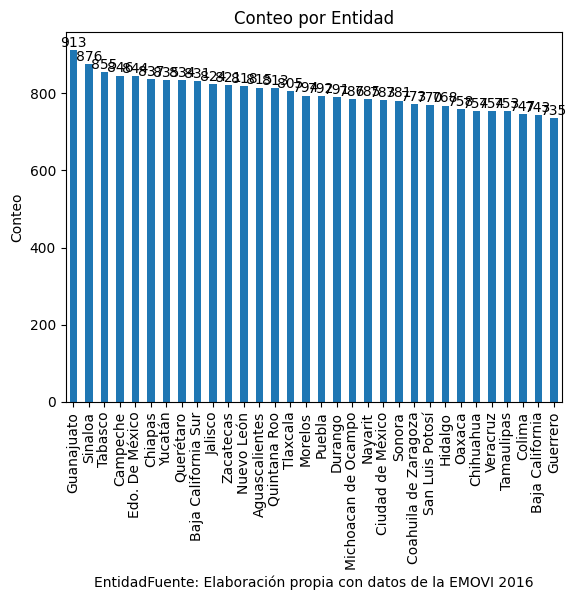

In [14]:
#Grafico de total de encuestas por entiedades federativas 

conteo_entidades = emovi['Entidad'].value_counts()

# Crear el gráfico de barras
ax = conteo_entidades.plot(kind='bar')
plt.xlabel('Entidad'   
          "Fuente: Elaboración propia con datos de la EMOVI 2016")
plt.ylabel('Conteo')
plt.title('Conteo por Entidad')

# Agregar los valores de cada columna al final de la gráfica
for i, v in enumerate(conteo_entidades):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

Se observa que aunque Guanajuato cuenta con la mayor cantidad de encuestas obtenidas, estas son parecidas en el resto de entidades. 

## Entidad federativa vs escolaridad acumulada del informante 

En este caso se realiza un pequeño cruce de información entre la Entiedad Federativa y la Escvolaridad Acumulada del informante, que en este caso se refiere a los años de estudio con los que cuenta al momento del levantamiento de la información 

In [15]:
# manera informativa vamos a crear un cruce de información entre la Entidad y la escolaridad acumulada del 
# entrevistado

cruce_info = emovi.groupby(['Entidad', 'EscAcu_Inf']).size().unstack(fill_value=0)

# Mostrar el cruce de información
print(cruce_info)

EscAcu_Inf             0   1   2   3   4   5    6   7   8    9   ...  15   16  \
Entidad                                                          ...            
Aguascalientes         18   6   9  16  12  12  109   8  22  220  ...  20   56   
Baja California        15   6  15  12   2  13   85  16  24  204  ...  15   63   
Baja California Sur     9   8  18  25  12  24  111  16  31  179  ...  21   58   
Campeche               66  24  26  27  12  13   78   9   9  237  ...  17   66   
Chiapas               100  28  40  56  33  22  166   3  20  162  ...   8   32   
Chihuahua              24   9   7  32  13  15  110  11  22  204  ...  19   38   
Ciudad de México        8   8   8   6   2   4   56  13  21  160  ...  19  147   
Coahuila de Zaragoza   14   4  10  17   9   9  109  10  21  203  ...  18   48   
Colima                 28  13  16  30  19  13   94  13  25  175  ...  16   44   
Durango                32   9  12  35  19  19  109   8  23  210  ...  12   55   
Edo. De México         23  1

Cruce de información entre la Entidad Federativa y la escolaridad del entrevistado, la cual esta dada por años de estudio quedando como se muestran en la siguiente tabla: 


| Valor | Etiqueta 
|---|---|
| 00	| Ninguno
| 01	| Preescolar o Kínder
| 02	| Primaria
| 03	| Secundaria
| 04	| Preparatoria o bachillerato
| 05	| Normal básica
| 06	| Estudios técnicos o comerciales con primaria terminada
| 07	| Estudios técnicos o comerciales con secundaria terminada
| 08	| Estudios técnicos o comerciales con preparatoria terminada
| 09	| Normal de licenciatura
| 10	| Licenciatura o profesional
| 11	| Maestría
| 12	| Doctorado
| b	| Blanco por pase


In [83]:
cruce_info = emovi.groupby(['Entidad', 'P8_3N']).size().unstack(fill_value=0)

# Mostrar el cruce de información
print(cruce_info)

P8_3N                     00  01   02   03   04  05  06   07  08  09   10  11  \
Entidad                                                                         
Aguascalientes        13   1   4  164  245  130   3   5   40  14   8  158  27   
Baja California       15   0   0  133  237  165   2   7   38   3   4  130   8   
Baja California Sur    7   2   0  198  221  175   4   5   43   2  11  150  12   
Campeche              55  11   0  180  254  155   6   1   34   5  11  113  19   
Chiapas               95   4   1  345  185   93   3   0   13   3   3   76  14   
Chihuahua             24   0   0  186  222  139   3  15   27   1   8  114  10   
Ciudad de México       8   0   0   84  191  147   3   3   66   1   5  237  34   
Coahuila de Zaragoza  12   2   0  158  220   93  13  14   93  12  10  125  19   
Colima                22   5   1  185  210  136   3   3   39   1  11  112  14   
Durango               31   1   0  203  239  122  10   2   44   1   7  114  16   
Edo. De México        23   0

In [84]:
#Cruce de información entre la edad del entrevistado y su nivel de estudios

cruce_info_edad = emovi.groupby(['P1_2', 'P8_3N']).size().unstack(fill_value=0)

# Mostrar el cruce de información
print(cruce_info_edad)

P8_3N      00  01   02   03   04  05  06  07  08  09   10  11  12
P1_2                                                             
25      6   0   0   82  241  199   0   0  20  10   2  190   5   0
26      1   0   0   83  230  203   1   0  16   9   7  184  10   1
27      5   0   0   86  228  182   2   0  18   5   6  171   8   0
28      7   1   1   95  238  196   1   0  14  12   5  164  14   1
29      7   1   0   84  211  152   2   0  20   3   7  158   8   1
30     13   1   1  122  253  178   1   0  18   5   9  163  24   2
31      9   0   0   95  203  171   1   0  15  10   6  141  13   2
32     12   0   0  149  277  158   1   0  15   5   4  170  22   2
33     12   0   1  151  258  141   2   0  15   5   7  141  20   2
34     12   0   1  131  238  152   0   0  17   5   4  108  22   1
35     12   2   0  149  287  144   0   0  31   5   8  132  20   1
36     11   0   1  169  273  150   1   0  37   4  12  145  19   6
37     21   1   1  187  238  115   1   1  31   4   4  124  15   3
38     20 

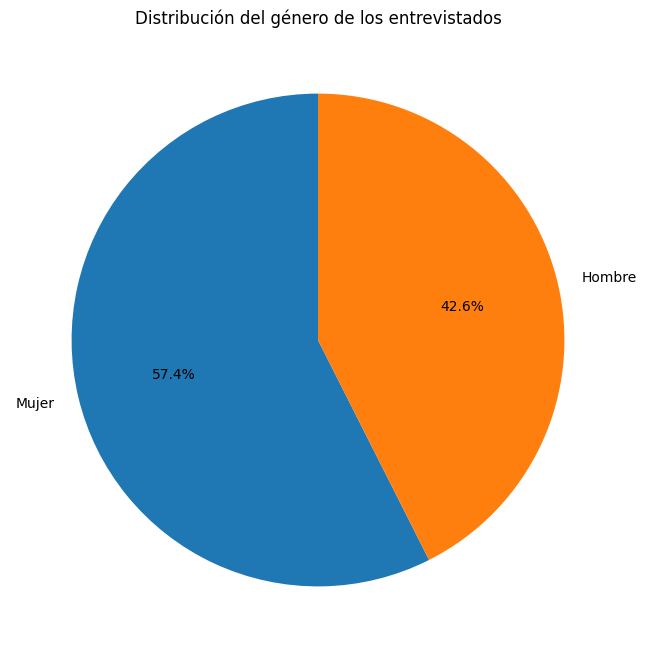

In [85]:
#Distribución del género de los entrevistados

# Mapear las egtiquetas de la variable donde esta el género
mapeo_etiquetas = {1: 'Hombre', 2: 'Mujer'}

# Reemplazar los valores de P1_1 con las etiquetas correspondientes
emovi['P1_1_etiqueta'] = emovi['P1_1'].map(mapeo_etiquetas)

# Obtener la frecuencia de cada valor único en la columna 'P1_1_etiqueta'
frecuencia_P1_1 = emovi['P1_1_etiqueta'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8)) 
frecuencia_P1_1.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución del género de los entrevistados')
plt.ylabel('')  # Eliminar etiqueta del eje y
plt.show()

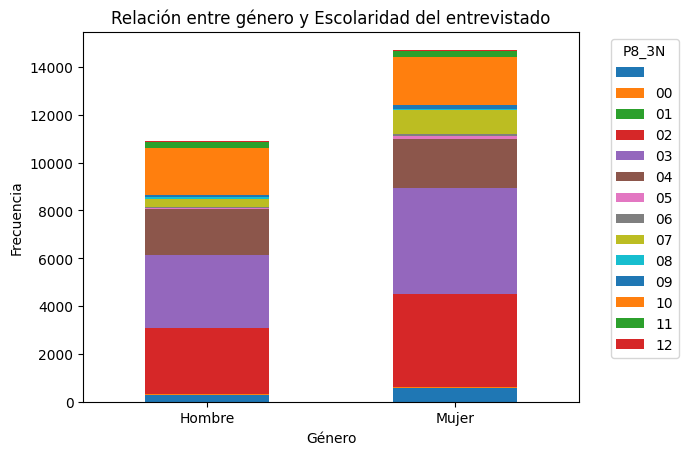

In [88]:
# Mapear los valores de P1_1 a las etiquetas deseadas
mapeo_etiquetas = {1: 'Hombre', 2: 'Mujer'}

# Reemplazar los valores de P1_1 con las etiquetas correspondientes
emovi['P1_1_etiqueta'] = emovi['P1_1'].map(mapeo_etiquetas)

# Calcular el cruce de información entre P1_1_etiqueta y P8_3N
cruce_info = emovi.groupby(['P1_1_etiqueta', 'P8_3N']).size().unstack(fill_value=0)

# Crear el gráfico de barras apilado
cruce_info.plot(kind='bar', stacked=True)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Relación entre género y Escolaridad del entrevistado')
plt.legend(title='P8_3N', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.show()

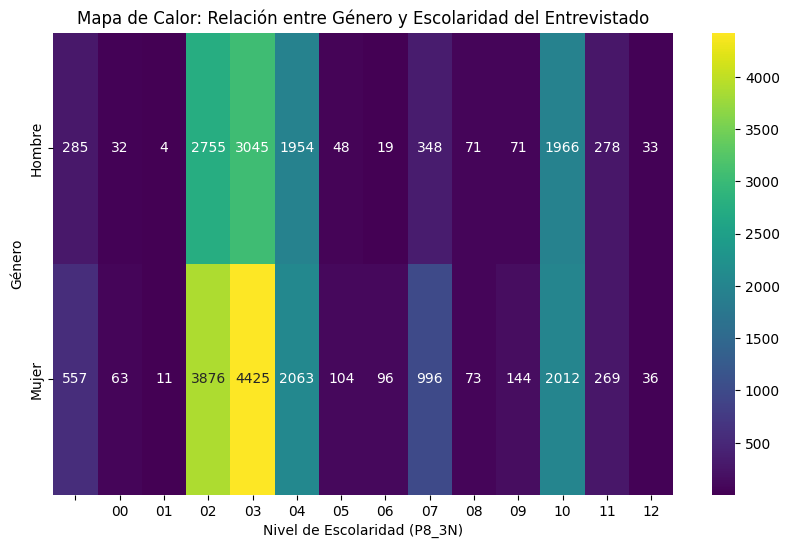

In [89]:
# Mapear los valores de P1_1 a las etiquetas deseadas
mapeo_etiquetas = {1: 'Hombre', 2: 'Mujer'}

# Reemplazar los valores de P1_1 con las etiquetas correspondientes
emovi['P1_1_etiqueta'] = emovi['P1_1'].map(mapeo_etiquetas)

# Calcular el cruce de información entre P1_1_etiqueta y P8_3N
cruce_info = emovi.groupby(['P1_1_etiqueta', 'P8_3N']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según sea necesario
sns.heatmap(cruce_info, annot=True, cmap='viridis', fmt='d')  # 'viridis' es solo una paleta de colores, puedes elegir otras
plt.xlabel('Nivel de Escolaridad (P8_3N)')
plt.ylabel('Género')
plt.title('Mapa de Calor: Relación entre Género y Escolaridad del Entrevistado')
plt.show()

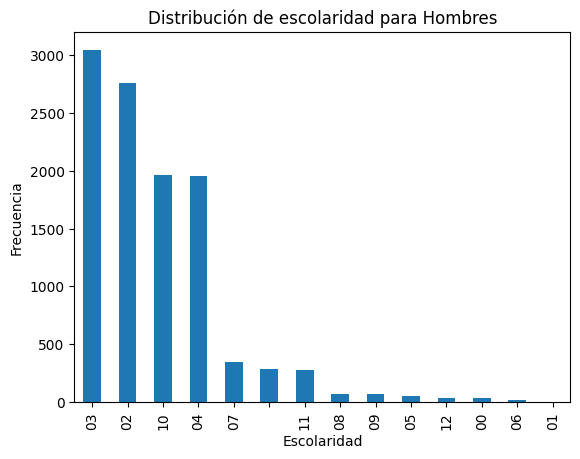

In [91]:
emovi_hombres = emovi[emovi['P1_1'] == 1]

# Calcular el cruce de información entre P1_1 y P8_3N para los hombres
cruce_info_hombres = emovi_hombres['P8_3N'].value_counts()

# Crear el gráfico de barras
cruce_info_hombres.plot(kind='bar')
plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.title('Distribución de escolaridad para Hombres')
plt.show()

In [95]:


# Definir el diccionario de mapeo de valores
mapeo_P8_3N = {
    '00': 'Ninguno',
    '01': 'Preescolar o Kínder',
    '02': 'Primaria',
    '03': 'Secundaria',
    '04': 'Preparatoria o bachillerato',
    '05': 'Normal básica',
    '06': 'Estudios técnicos o comerciales con primaria terminada',
    '07': 'Estudios técnicos o comerciales con secundaria terminada',
    '08': 'Estudios técnicos o comerciales con preparatoria terminada',
    '09': 'Normal de licenciatura',
    '10': 'Licenciatura o profesional',
    '11': 'Maestría',
    '12': 'Doctorado',
    'b': 'Blanco por pase'
}

# Reemplazar los valores de la variable P8_3N con las etiquetas correspondientes
emovi['P8_3N_etiqueta'] = emovi['P8_3N'].map(mapeo_P8_3N)

# Verificar los primeros registros para asegurarnos de que se haya creado correctamente la columna 'P8_3N_etiqueta'
print(emovi[['P8_3N', 'P8_3N_etiqueta']].head())


  P8_3N              P8_3N_etiqueta
0    10  Licenciatura o profesional
1    11                    Maestría
2    10  Licenciatura o profesional
3    02                    Primaria
4    10  Licenciatura o profesional


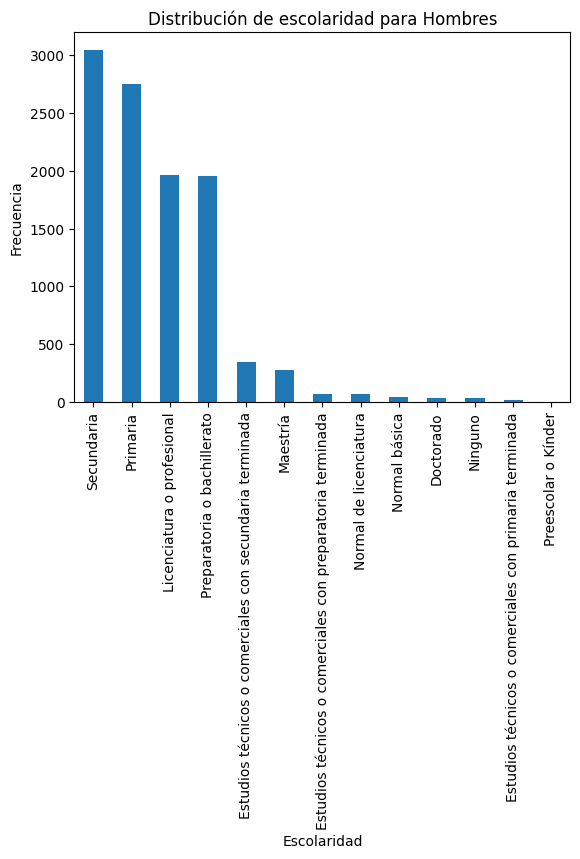

In [96]:
emovi_hombres = emovi[emovi['P1_1'] == 1]

# Calcular el cruce de información entre P1_1 y P8_3N para los hombres
cruce_info_hombres = emovi_hombres['P8_3N_etiqueta'].value_counts()

# Crear el gráfico de barras
cruce_info_hombres.plot(kind='bar')
plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.title('Distribución de escolaridad para Hombres')
plt.show()

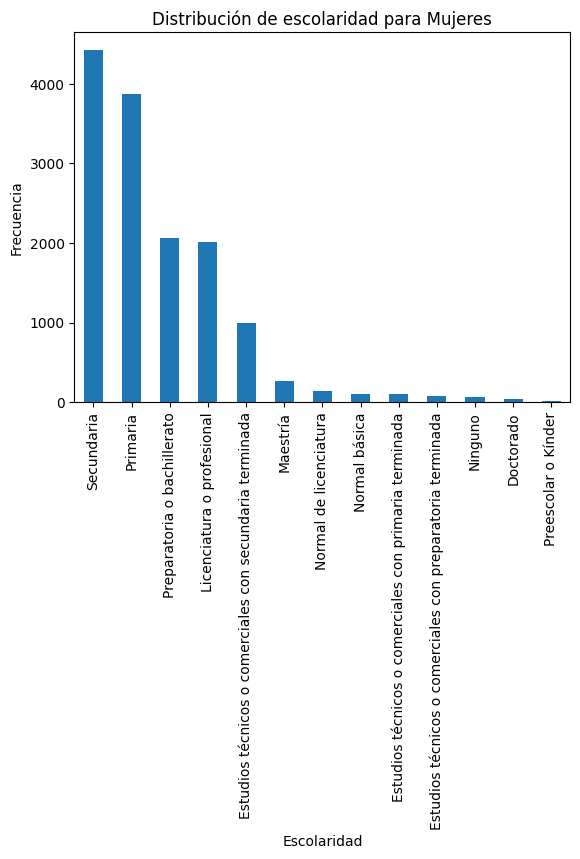

In [97]:
emovi_mujeres = emovi[emovi['P1_1'] == 2]

# Calcular el cruce de información entre P1_1 y P8_3N para las mujeres
cruce_info_mujeres = emovi_mujeres['P8_3N_etiqueta'].value_counts()

# Crear el gráfico de barras
cruce_info_mujeres.plot(kind='bar')
plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.title('Distribución de escolaridad para Mujeres')
plt.show()

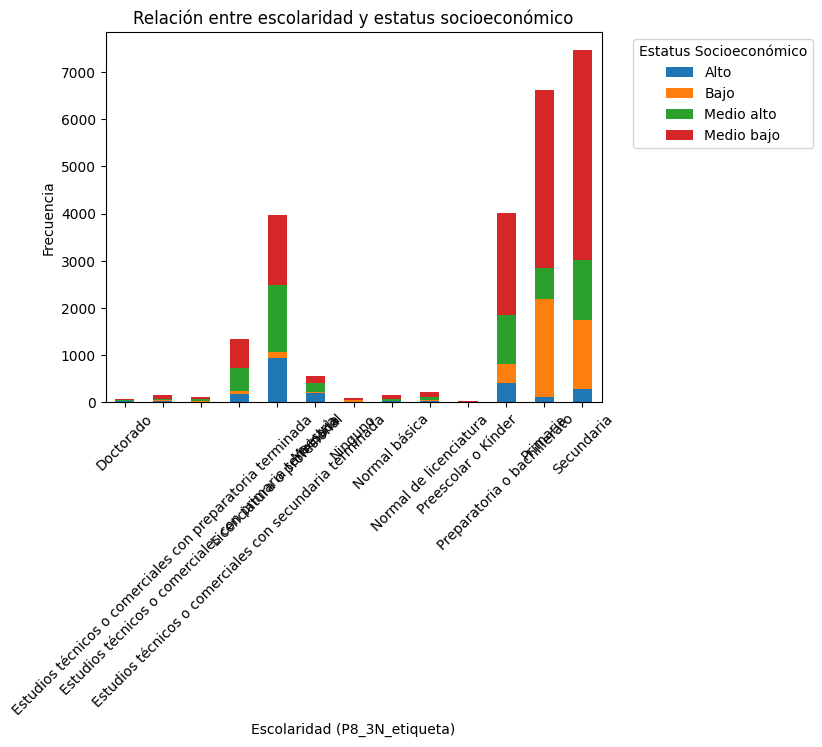

In [98]:
# Escolaridad vs estrato socieconómico 

mapeo_est_socio = {
    1: 'Bajo',
    2: 'Medio bajo',
    3: 'Medio alto',
    4: 'Alto'
}

# Reemplazar los valores de est_socio_ENH con las etiquetas correspondientes
emovi['est_socio_etiqueta'] = emovi['est_socio_ENH'].map(mapeo_est_socio)

# Calcular el cruce de información entre P8_3N_etiqueta y est_socio_etiqueta
cruce_info = emovi.groupby(['P8_3N_etiqueta', 'est_socio_etiqueta']).size().unstack(fill_value=0)

# Crear el gráfico de barras apilado
cruce_info.plot(kind='bar', stacked=True)
plt.xlabel('Escolaridad (P8_3N_etiqueta)')
plt.ylabel('Frecuencia')
plt.title('Relación entre escolaridad y estatus socioeconómico')
plt.legend(title='Estatus Socioeconómico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

In [99]:
mapeo_est_socio = {
    1: 'Bajo',
    2: 'Medio bajo',
    3: 'Medio alto',
    4: 'Alto'
}

# Reemplazar los valores de est_socio_ENH con las etiquetas correspondientes
emovi['est_socio_etiqueta'] = emovi['est_socio_ENH'].map(mapeo_est_socio)

# Calcular el cuadro de cruce de información entre P8_3N_etiqueta y est_socio_etiqueta
cuadro_cruce = pd.crosstab(index=emovi['P8_3N_etiqueta'], columns=emovi['est_socio_etiqueta'])

# Mostrar el cuadro de cruce de información
print(cuadro_cruce)

est_socio_etiqueta                                  Alto  Bajo  Medio alto  \
P8_3N_etiqueta                                                               
Doctorado                                             23     2          24   
Estudios técnicos o comerciales con preparatori...    25     8          39   
Estudios técnicos o comerciales con primaria te...    10     3          55   
Estudios técnicos o comerciales con secundaria ...   179    56         480   
Licenciatura o profesional                           931   127        1426   
Maestría                                             200     8         190   
Ninguno                                                0    46           0   
Normal básica                                         19     8          36   
Normal de licenciatura                                29    10          68   
Preescolar o Kínder                                    0     9           2   
Preparatoria o bachillerato                          411   393  

In [100]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Calcular el cuadro de cruce de información entre P8_3N_etiqueta y est_socio_etiqueta
cuadro_cruce = pd.crosstab(index=emovi['P8_3N_etiqueta'], columns=emovi['est_socio_etiqueta'])

# Mostrar el cuadro de cruce de información
print(cuadro_cruce)

est_socio_etiqueta                                  Alto  Bajo  Medio alto  \
P8_3N_etiqueta                                                               
Doctorado                                             23     2          24   
Estudios técnicos o comerciales con preparatori...    25     8          39   
Estudios técnicos o comerciales con primaria te...    10     3          55   
Estudios técnicos o comerciales con secundaria ...   179    56         480   
Licenciatura o profesional                           931   127        1426   
Maestría                                             200     8         190   
Ninguno                                                0    46           0   
Normal básica                                         19     8          36   
Normal de licenciatura                                29    10          68   
Preescolar o Kínder                                    0     9           2   
Preparatoria o bachillerato                          411   393  

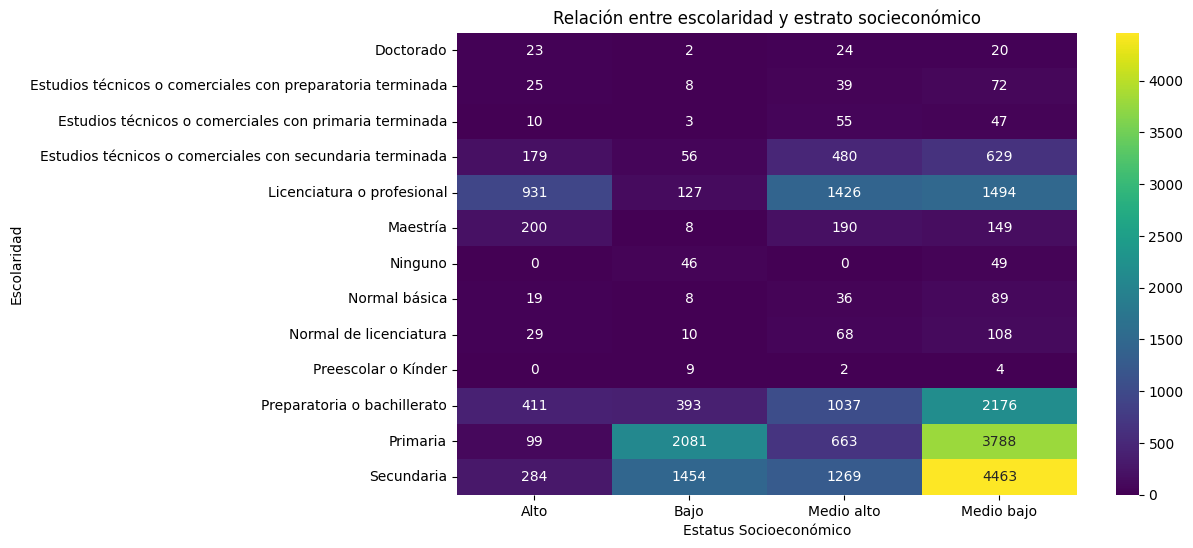

In [101]:
# Crear el gráfico de calor

plt.figure(figsize=(10, 6))  
sns.heatmap(cuadro_cruce, annot=True, cmap='viridis', fmt='d')  
plt.title('Relación entre escolaridad y estrato socieconómico')
plt.xlabel('Estatus Socioeconómico')
plt.ylabel('Escolaridad')
plt.show()

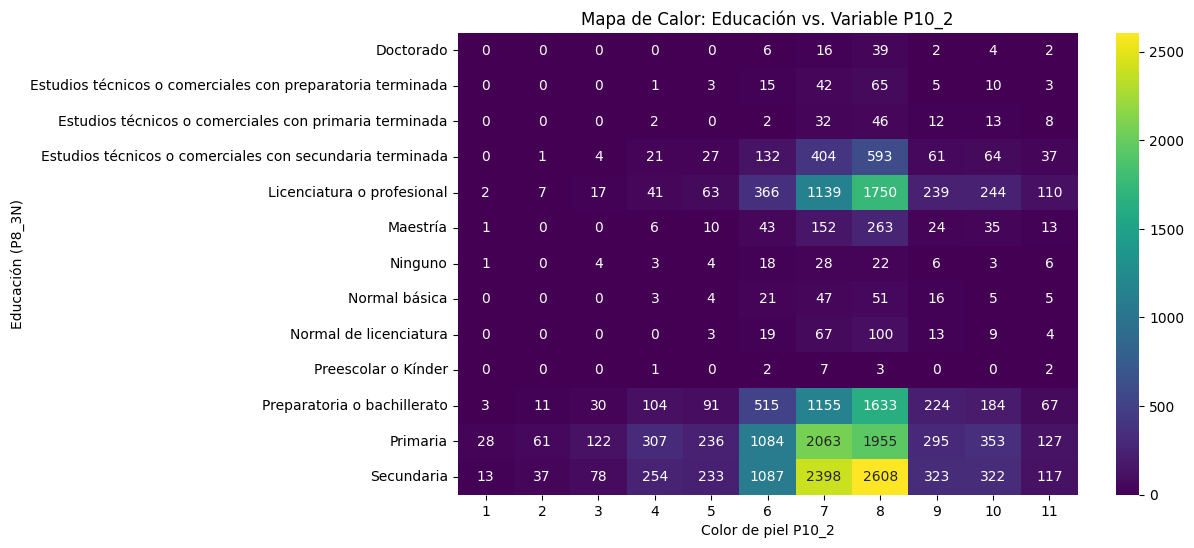

In [111]:
emovi['P8_3N_etiqueta'] = emovi['P8_3N'].map(mapeo_P8_3N)


# Crear la tabla de frecuencia cruzada entre P8_3N y P10_2
tabla_frecuencia = pd.crosstab(index=emovi['P8_3N_etiqueta'], columns=emovi['P10_2'])

# Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según sea necesario
sns.heatmap(tabla_frecuencia, cmap='viridis', annot=True, fmt='d')  # 'viridis' es solo una paleta de colores, puedes elegir otras
plt.xlabel('Color de piel P10_2')
plt.ylabel('Educación (P8_3N)')
plt.title('Mapa de Calor: Educación vs. Variable P10_2')
plt.show()

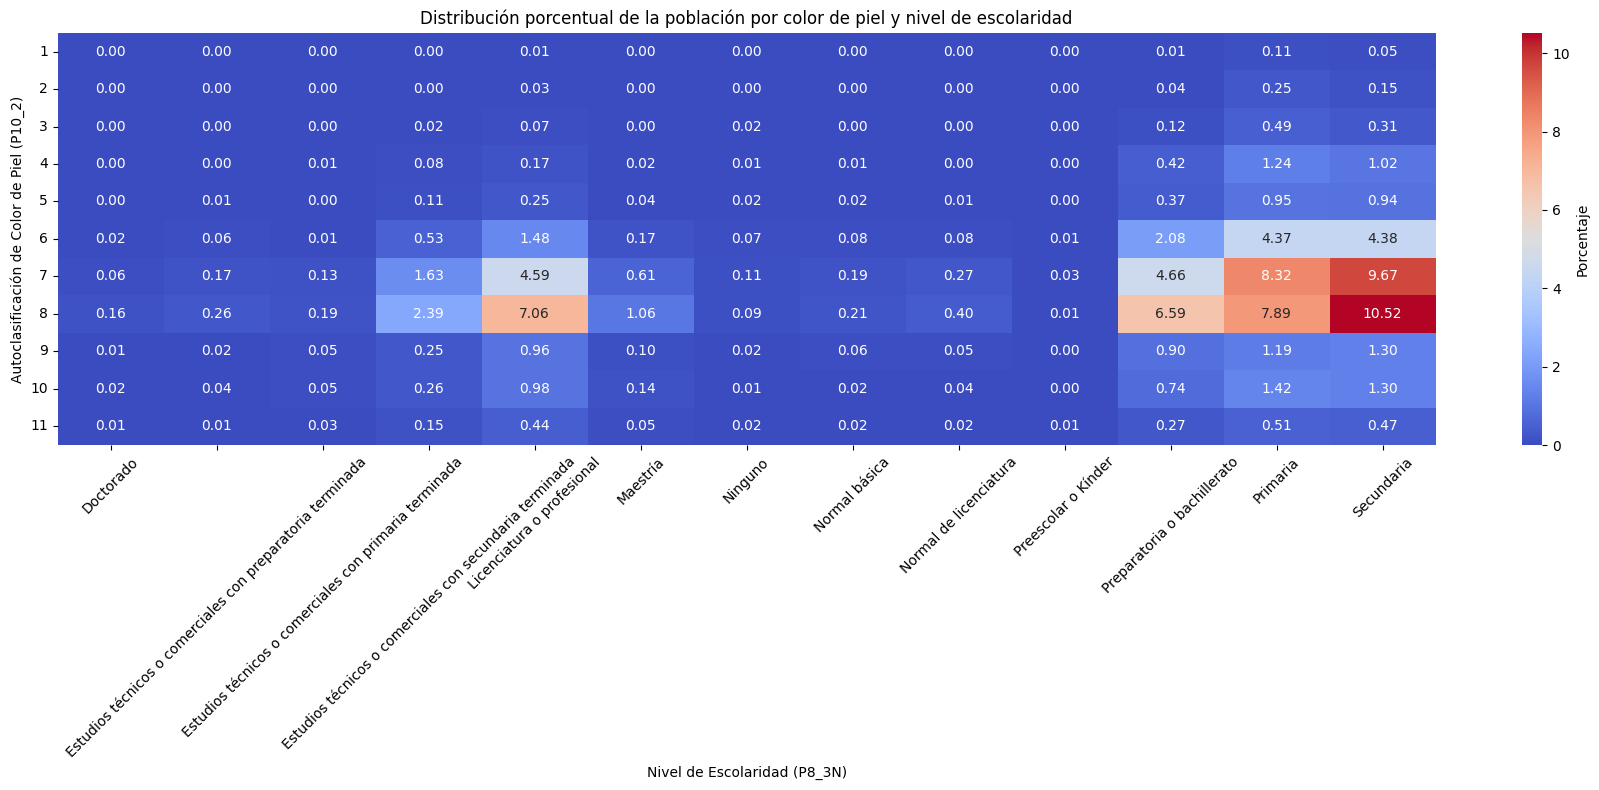

In [121]:
# Filtra los datos para incluir solo personas de 25 a 64 años
emovi_filtrado = emovi[(emovi['P1_2'] >= 25) & (emovi['P1_2'] <= 64)]

# Agrupa los datos por P10_2 (color de piel) y P8_3N (nivel de escolaridad)
grupo_por_color_escolaridad = emovi_filtrado.groupby(['P10_2', 'P8_3N_etiqueta']).size().unstack(fill_value=0)

# Calcula el tamaño total de la población
total_poblacion = grupo_por_color_escolaridad.sum().sum()

# Calcula los porcentajes
porcentajes = (grupo_por_color_escolaridad / total_poblacion) * 100

# Redondea los porcentajes a dos decimales
porcentajes_redondeados = porcentajes.round(2)

# Crea el mapa de calor
plt.figure(figsize=(18, 8))
sns.heatmap(porcentajes_redondeados, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Porcentaje'})
plt.xlabel('Nivel de Escolaridad (P8_3N)')
plt.ylabel('Autoclasificación de Color de Piel (P10_2)')
plt.title('Distribución porcentual de la población por color de piel y nivel de escolaridad')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

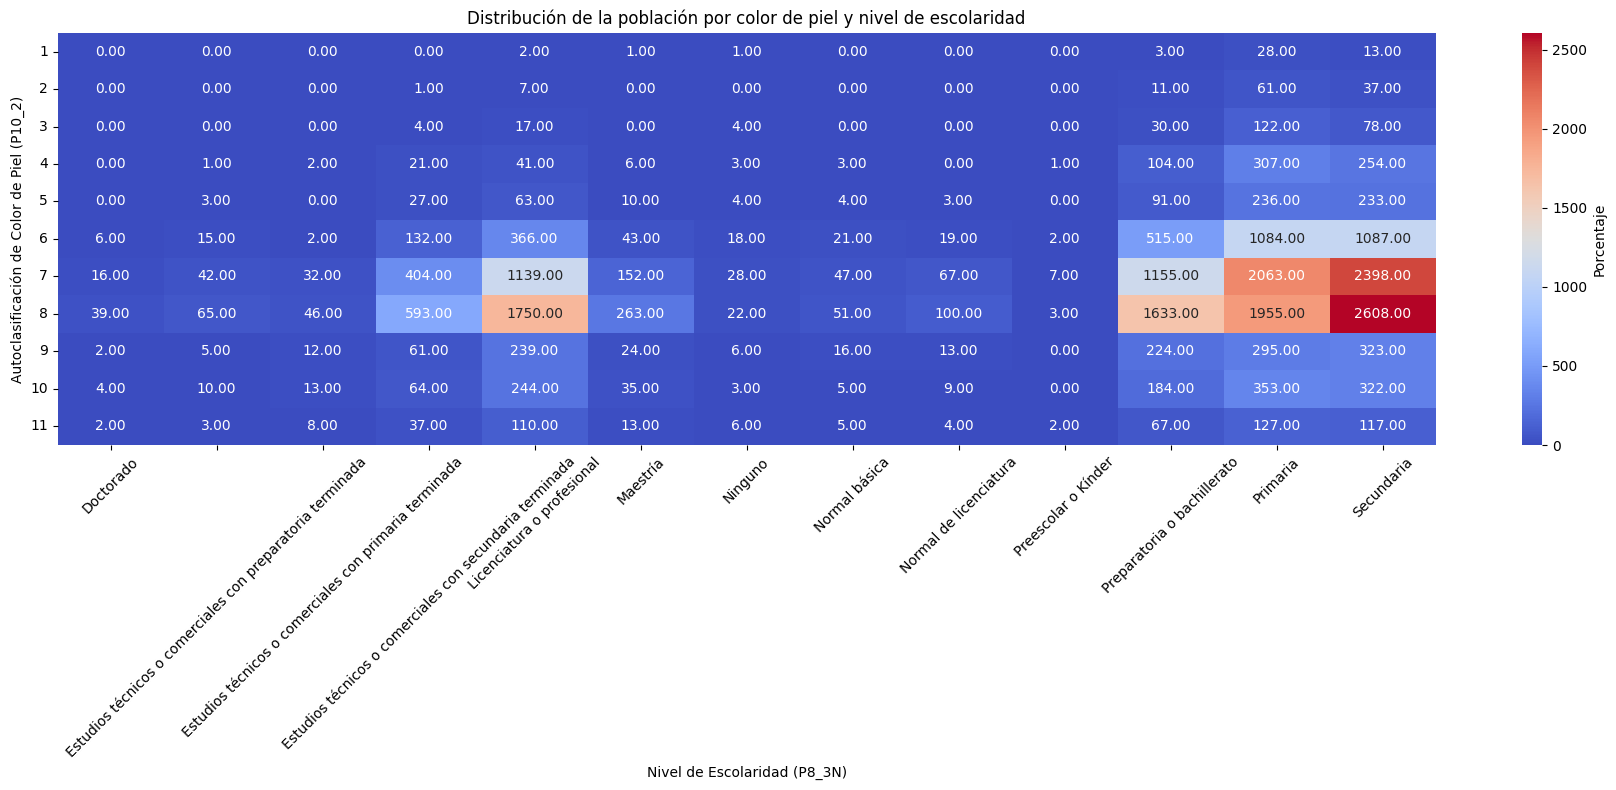

In [124]:
# Filtra los datos para incluir solo personas de 25 a 64 años
emovi_filtrado = emovi[(emovi['P1_2'] >= 25) & (emovi['P1_2'] <= 64)]

# Agrupa los datos por P10_2 (color de piel) y P8_3N (nivel de escolaridad)
grupo_por_color_escolaridad = emovi_filtrado.groupby(['P10_2', 'P8_3N_etiqueta']).size().unstack(fill_value=0)

# Crea el mapa de calor
plt.figure(figsize=(18, 8))
sns.heatmap(grupo_por_color_escolaridad, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Porcentaje'})
plt.xlabel('Nivel de Escolaridad (P8_3N)')
plt.ylabel('Autoclasificación de Color de Piel (P10_2)')
plt.title('Distribución de la población por color de piel y nivel de escolaridad')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [2]:
pip install geopandas


     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/5

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:

import geopandas as gpd

# Cargar los datos geoespaciales de los estados (GeoJSON)

mexico_estados = gpd.read_file('C:\Users\reyna\OneDrive\Documentos\Maestría\desarollo_de_proyecto\Sprint\data\estados.json')


# Cargar los datos del nivel educativo por estado (usando los datos de emovi)
datos_educativos = emovi[['Entidad', 'P8_3N']].copy()
datos_educativos.rename(columns={'Entidad': 'estado_id'}, inplace=True)

# Fusionar los datos geoespaciales con los datos educativos
mexico_estados = mexico_estados.merge(datos_educativos, how='left', on='estado_id')

# Visualizar el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mexico_estados.plot(column='P8_3N', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
plt.title('Nivel educativo por estado')
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1685350490.py, line 5)